# Верификация лица человека с помощью предварительно обученной нейронной сети (библиотека dlib)

## Алгоритм верификации

   Для решения задачи верификации мы будем использовать сверточную нейронную сеть, а именно предварительно обученную нейронную сеть ResNet. От сети отрезаются слои, отвечающие за классификацию, и остаются только сверточные слои, которые извлекают ключевые признаки из изображения. Результат работы - набор чисел, который называется дескриптором. Такие дескрипторы мы извлечем из фотографии человека в паспорте и с фотографии, сделанной в более позднее время.
   Библиотека dlib использует модифицированный вариант сети ResNet34. Эта сеть выдает дескрипторы из 128 чисел. Сеть обучена специальным образом так, чтобы дескрипторы фотографий одного человека находились рядом друг с другом, а дескрипторы фотографий разных людей - далеко друг от друга.
   Чтобы оценить близость дескрипторов в dlib используется Евклидово расстояние. Если значение Евклидова расстояния между дескрипторами меньше 0.6, то считается, что на фотографиях один и тот же человек. С использованием такой метрики dlib обеспечивает точность 99.38% на тесте распознавания лиц Labeled Faces in the Wild.

## Импорт необходимых модулей

In [9]:
import dlib
from skimage import io
from scipy.spatial import distance
from IPython.display import Image

Подключаем библиотеку dlib, модуль io из библиотеки scikit-image для загрузки фотографий из файлов, а также модуль distance из библиотеки SciPy, который будет использоваться для расчета Евклидова расстояния.

## Создаем модели для распознавания лиц на основе ранее загруженных файлов:

In [3]:
shape_pred = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [4]:
face_rec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [5]:
detector = dlib.get_frontal_face_detector()

## Верификация личности по фотографиям для одного человека

### Загружаем и показываем первую фотографию

Для верификации возьмем две фотографии одного и того же человека (с сайта adme.ru), сделанные в разном возрасте (на паспорт и в более позднее время)

In [6]:
img = io.imread('adme_one.jpg')
win1 = dlib.image_window()
win1.clear_overlay()
win1.set_image(img)

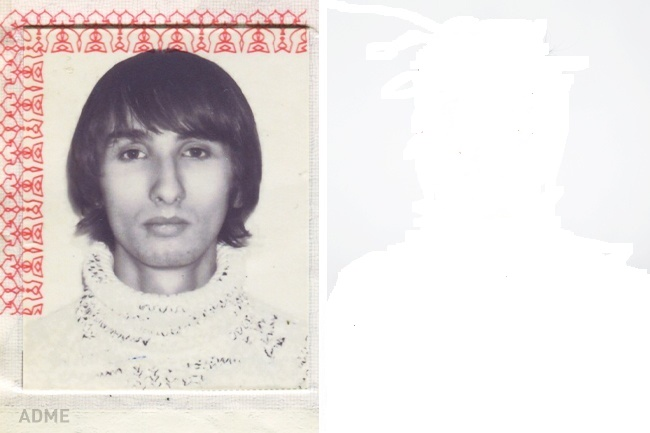

In [11]:
Image(filename='./adme_one.jpg')

Находим на фотографии лицо по 68 ключевым точкам

In [12]:
dets = detector(img, 1)
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
    win1.clear_overlay()
    win1.add_overlay(d)
    win1.add_overlay(shape)

Detection 0: Left: 425 Top: 82 Right: 554 Bottom: 211
Detection 1: Left: 96 Top: 125 Right: 225 Bottom: 254


Извлекаем дескриптор из найденного лица

In [14]:
face_descriptor1 = face_rec.compute_face_descriptor(img, shape)

### Загружаем и показываем вторую фотографию

In [15]:
img = io.imread('adme_sec.jpg')
win2 = dlib.image_window()
win2.clear_overlay()
win2.set_image(img)

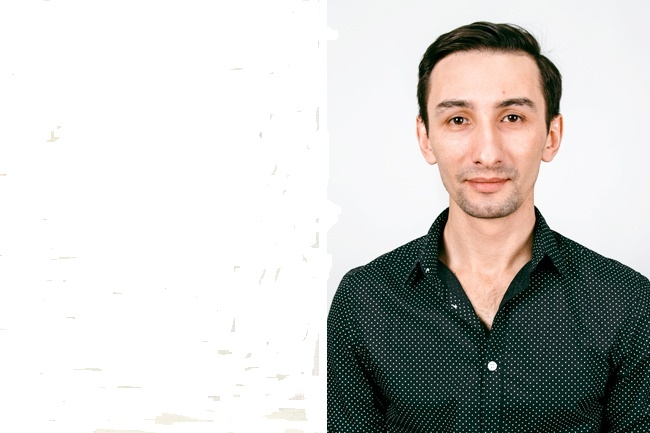

In [16]:
Image(filename='./adme_sec.jpg')

Находим на фотографии лицо по 68 ключевым точкам

In [17]:
dets_sec = detector(img, 1)
for k, d in enumerate(dets_sec):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
    win2.clear_overlay()
    win2.add_overlay(d)
    win2.add_overlay(shape)

Detection 0: Left: 425 Top: 82 Right: 554 Bottom: 211


Извлекаем дескриптор из найденного лица

In [18]:
face_descriptor2 = face_rec.compute_face_descriptor(img, shape)

### Производим верификацию личности

Теперь у нас есть два дескриптора лиц с разных фотографий face_descriptor1 и face_descriptor2. Чтобы определить, один и тот же человек на фотографиях, или нет, нам нужно найти Евклидово расстояние между дескрипторами

In [20]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print('Евклидово расстояние = ', a)

Евклидово расстояние =  0.501259694816873


Евклидово расстояние меньше 0.6, значит две фотографии принадлежат одному человеку (согласно рекомендации разработчиков библиотеки dlib).

## Верификация личности по фотографиям для разных людей

Давайте попробуем сравнить фотографии разных людей. Загружаем фотографию другого человека и выделяем ее дескриптор

In [22]:
img = io.imread('adme_another.jpg')
win2 = dlib.image_window()
win2.clear_overlay()
win2.set_image(img)

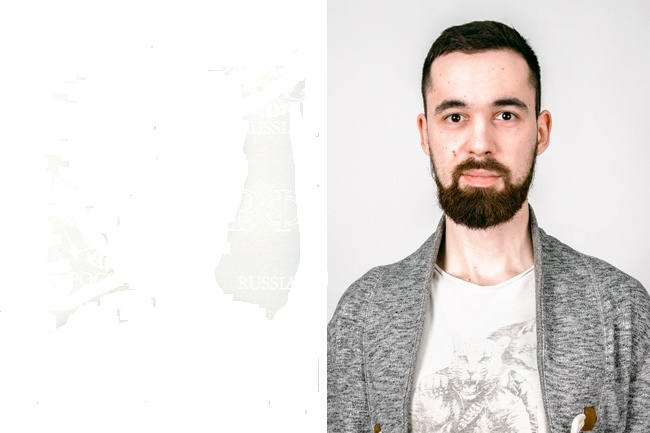

In [23]:
Image(filename='./adme_another.jpg')

Находим на фотографии лицо по 68 ключевым точкам

In [24]:
dets_another = detector(img, 1)
for k, d in enumerate(dets_another):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
    win2.clear_overlay()
    win2.add_overlay(d)
    win2.add_overlay(shape)

Detection 0: Left: 411 Top: 82 Right: 540 Bottom: 211


Извлекаем дескриптор из найденного лица

In [25]:
face_descriptor2 = face_rec.compute_face_descriptor(img, shape)

Рассчитываем Евклидово расстояние

In [27]:
a = distance.euclidean(face_descriptor1, face_descriptor2)
print('Евклидово расстояние = ', a)

Евклидово расстояние =  0.7359451396669721


Расстояние больше 0.6, значит можно сделать вывод, что на фотографиях разные люди.